In [7]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


# Load data

In [2]:
path_dataset = '../../data/graduate-admissions/Admission_Predict.csv'
df_admission = pd.read_csv(path_dataset, index_col='Serial No.')


In [3]:
df_admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
df_admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

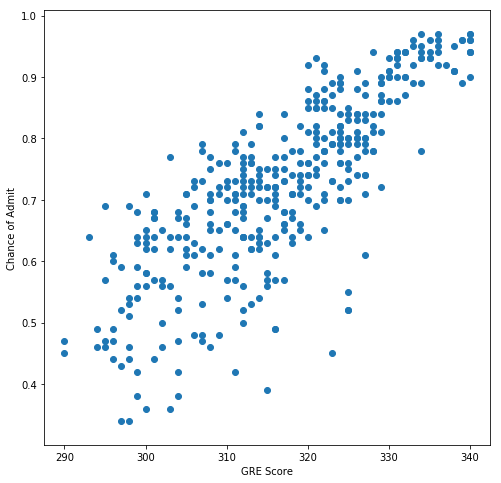

In [4]:
plt.figure(figsize=(8,8))

plt.scatter(df_admission['GRE Score'], df_admission['Chance of Admit '])

plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')

plt.show()

# Features

In [17]:
X = df_admission[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']].values
y = df_admission['Chance of Admit '].values

# Train test set

In [6]:
# Build X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


# Model

In [8]:
# Create linear regression object
regr = LinearRegression()

In [9]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
y_pred.shape, y_test.shape, X_test.shape

((132,), (132,), (132, 1))

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.5f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [0.00982658]
Mean squared error: 0.00640
Variance score: 0.67


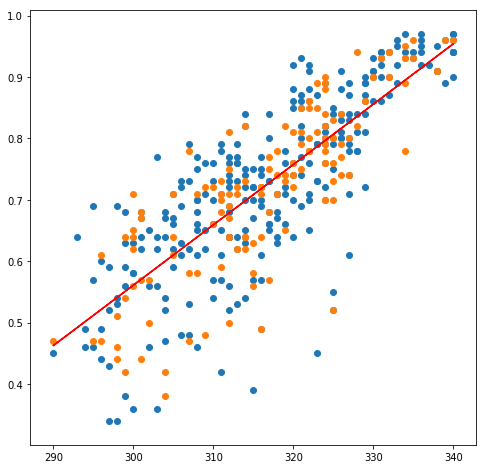

In [15]:
# Plot outputs
plt.figure(figsize=(8,8))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')
plt.show()